In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [ ]:
dataset_path = "../data/Mental_Health_Lifestyle_Dataset.csv"
df = pd.read_csv(dataset_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      2405 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ KB


In [20]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

print("ÏàòÏπòÌòï:", numeric_cols)
print("Î≤îÏ£ºÌòï:", categorical_cols)

# ÏöîÏïΩ Ï†ïÎ≥¥ ÎßåÎì§Í∏∞
num_summary = pd.DataFrame([
    {
        "Column": col,
        "Min": df[col].min(),
        "Max": df[col].max(),
        "Median": round(df[col].median(), 2),
        "Std": round(df[col].std(), 2)
    }
    for col in numeric_cols
])

# Ï∂úÎ†•
print("ÏàòÏπòÌòï Î≥ÄÏàò ÏöîÏïΩ:")
print(num_summary)

cat_values = {col: df[col].unique().tolist() for col in categorical_cols}
cat_df = pd.DataFrame([
    {"Column": col, "Unique Values": values}
    for col, values in cat_values.items()
])
print("Î≤îÏ£ºÌòï value Î™©Î°ù:")
print(cat_df)

ÏàòÏπòÌòï: ['Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']
Î≤îÏ£ºÌòï: ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Stress Level', 'Mental Health Condition']
ÏàòÏπòÌòï Î≥ÄÏàò ÏöîÏïΩ:
                        Column   Min   Max  Median    Std
0                          Age  18.0  64.0    41.0  13.43
1                  Sleep Hours   1.4  11.3     6.5   1.50
2          Work Hours per Week  20.0  59.0    39.0  11.45
3  Screen Time per Day (Hours)   2.0   8.0     5.1   1.75
4     Social Interaction Score   1.0  10.0     5.5   2.56
5              Happiness Score   1.0  10.0     5.4   2.56
Î≤îÏ£ºÌòï value Î™©Î°ù:
                    Column                                      Unique Values
0                  Country  [Brazil, Australia, Japan, Germany, India, Can...
1                   Gender                              [Male, Female, Other]
2           Exercise Level                              [Low, Moderat

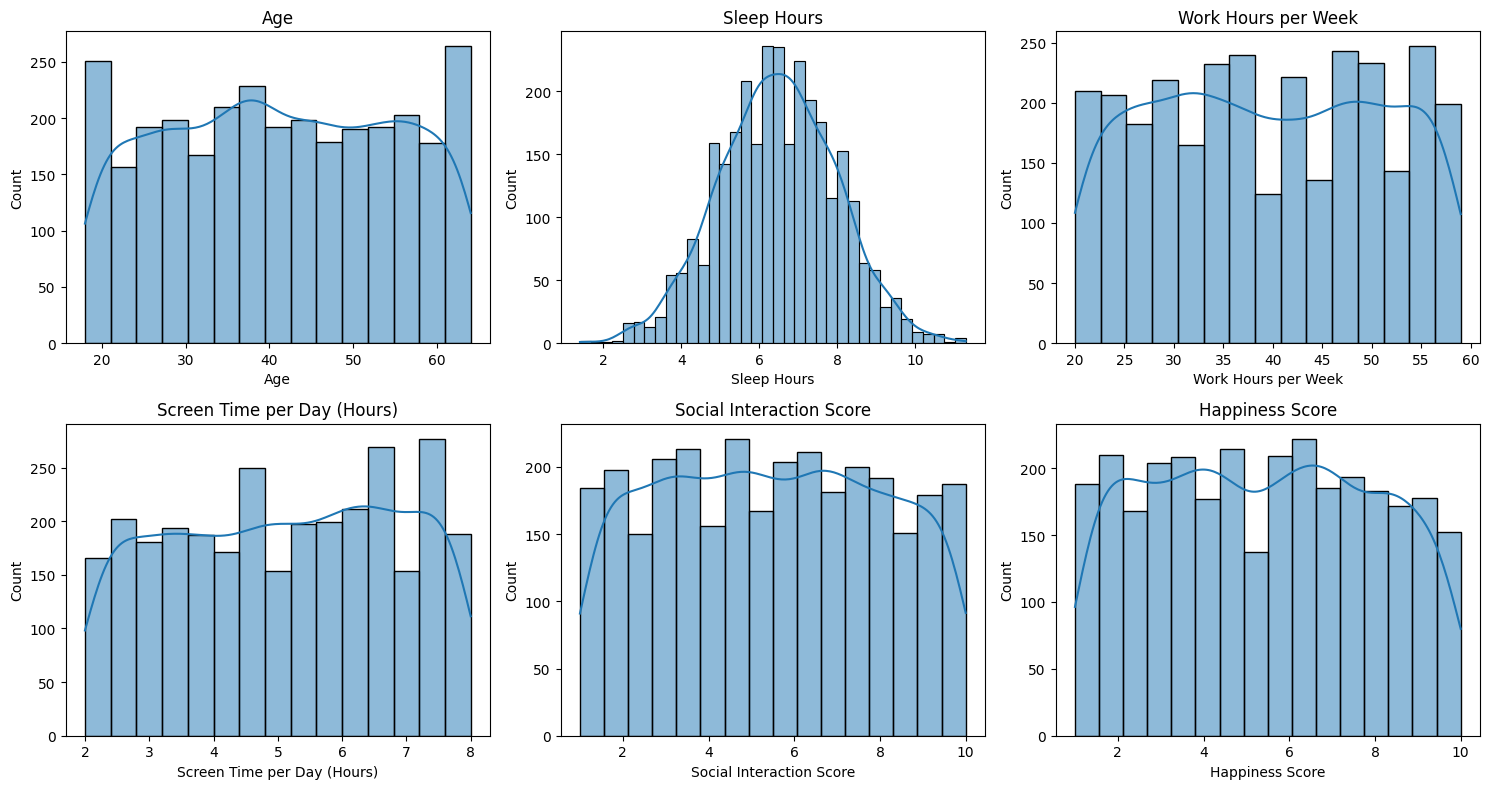

In [21]:
# numeric Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏ => Sleep HoursÎßå Ï†ïÍ∑úÎ∂ÑÌè¨ Î™®Ïñë
cols = 3
rows = 2

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()


# Ï†ÑÏ≤òÎ¶¨

### Î∞©Î≤ï1) Î£®Ìã¥Î≥ÄÏàò + ÌÉÄÍ≤üÎ≥ÄÏàòÎßå Ï†ÑÏ≤òÎ¶¨ (Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ï!)

* **Î£®Ìã¥ Î≥ÄÏàò+ÌÉÄÍ≤ü Î≥ÄÏàò**Îßå Ï†ÑÏ≤òÎ¶¨Ìïú ÏΩîÎìú.
* Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º ÌååÏùºÏùò Ïù¥Î¶ÑÏùÄ **"processed_routine_dataset2.csv"**

---

[Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ï]

numerical Î≥ÄÏàò -> Ï†ïÍ∑úÎ∂ÑÌè¨: standard Ï†ïÍ∑úÌôî/ Í∑∏Ïô∏: minmax Ï†ïÍ∑úÌôî

ordinal Î≥ÄÏàò -> labeling

nominal Î≥ÄÏàò -> one-hot encoding

[ÏÇ¨Ïö©Ìïú Î≥ÄÏàò Î™©Î°ù] - Î£®Ìã¥Î≥ÄÏàò + ÌÉÄÍ≤üÎ≥ÄÏàò ÏÇ¨Ïö©

numerical : Ï†ïÍ∑úÎ∂ÑÌè¨- Sleep Hours/ Í∑∏Ïô∏- Screen Time per Day (Hours), Social Interection Score, Happiness Score

ordinal : Exercise Level

nominal : Diet Type



In [ ]:
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(dataset_path, keep_default_na=False)

# 2. ÏàòÏπòÌòï Ïª¨Îüº Ï†ïÌïòÍ∏∞
numeric_std_cols = ['Sleep Hours']
numeric_minmax_cols = ['Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']

# 3. Ï†ïÍ∑úÌôî (MinMaxScaler)
scaler1 = StandardScaler()
df[numeric_std_cols] = scaler1.fit_transform(df[numeric_std_cols])
scaler2 = MinMaxScaler()
df[numeric_minmax_cols] = scaler2.fit_transform(df[numeric_minmax_cols])

# 4. Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÎ¶¨
# 4-1. Ordinal Î≥ÄÏàò -> Label Encoding
ordinal_map = {
    'Exercise Level': {'Low': 1, 'Moderate': 2, 'High': 3}
}
for col, mapping in ordinal_map.items():
    df[col] = df[col].map(mapping)

# 4-2. Nominal Î≥ÄÏàò -> One-Hot Encoding
nominal_cols = ['Diet Type']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, dtype=int)

# 5. csvÎ°ú Í≤∞Í≥º Ï†ÄÏû•
df.to_csv("../results/processed_routine_dataset2.csv", index=False)

# 6. Í≤∞Í≥º ÌôïÏù∏
df

Country  Age  Gender  Exercise Level  Sleep Hours Stress Level  \
0        Brazil   48    Male               1    -0.117319          Low   
1     Australia   31    Male               2    -1.050891          Low   
2         Japan   37  Female               1     0.482835         High   
3        Brazil   35    Male               1     0.482835          Low   
4       Germany   46    Male               1     0.549519          Low   
...         ...  ...     ...             ...          ...          ...   
2995      Japan   57  Female               2     0.349467         High   
2996  Australia   27    Male               1     0.416151          Low   
2997  Australia   42    Male               2    -0.317370         High   
2998  Australia   25    Male               3    -0.517421          Low   
2999      Japan   28  Female               3     0.282784         High   

     Mental Health Condition  Work Hours per Week  \
0                       None                   21   
1                       PTSD                   48   
2                       None                   43   
3                 Depression                   43   
4                    Anxiety                   35   
...                      ...                  ...   
2995              Depression                   29   
2996                    None                   47   
2997              Depression                   23   
2998                 Anxiety                   51   
2999              Depression                   41   

      Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  \
0                        0.333333                  0.755556         0.611111   
1                        0.533333                  0.800000         0.644444   
2                        0.450000                  0.955556         0.966667   
3                        0.033333                  0.800000         0.622222   
4                        0.266667                  0.411111         0.377778   
...                           ...                       ...              ...   
2995                     0.400000                  0.966667         0.544444   
2996                     0.900000                  0.588889         0.988889   
2997                     0.316667                  0.466667         0.344444   
2998                     0.383333                  0.544444         0.344444   
2999                     0.783333                  0.811111         0.133333   

      Diet Type_Junk Food  Diet Type_Keto  Diet Type_Vegan  \
0                       0               0                0   
1                       0               0                1   
2                       0               0                0   
3                       0               0                1   
4                       0               0                0   
...                   ...             ...              ...   
2995                    0               0                0   
2996                    1               0                0   
2997                    0               0                0   
2998                    0               1                0   
2999                    0               0                1   

      Diet Type_Vegetarian  
0                        1  
1                        0  
2                        1  
3                        0  
4                        0  
...                    ...  
2995                     0  
2996                     0  
2997                     0  
2998                     0  
2999                     0  

[3000 rows x 15 columns]

### Î∞©Î≤ï2) Î™®Îì† Î≥ÄÏàò Ï†ÑÏ≤òÎ¶¨

* ÌöåÏùò Í≤∞Í≥º Î£®Ìã¥ Î≥ÄÏàòÎßå Ï†ÑÏ≤òÎ¶¨ ÌïòÎäîÍ≤ÉÏúºÎ°ú ÏïåÍ≥† ÏûàÍ∏¥ ÌñàÎäîÎç∞, ÌòπÏãú ÏÇ¨Ïö©Ìï†Íπå Ïã∂Ïñ¥ **Î™®Îì† Î≥ÄÏàò** Ï†ÑÏ≤òÎ¶¨Ìïú ÏΩîÎìúÎèÑ ÏûëÏÑ±Ìï®.
* Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º ÌååÏùºÏùò Ïù¥Î¶ÑÏùÄ **"processed_all_dataset2.csv"**

---

[Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ï]

numerical Î≥ÄÏàò -> Ï†ïÍ∑úÎ∂ÑÌè¨: standard Ï†ïÍ∑úÌôî/ Í∑∏Ïô∏: minmax Ï†ïÍ∑úÌôî

ordinal Î≥ÄÏàò -> labeling

nominal Î≥ÄÏàò -> one-hot encoding

[ÏÇ¨Ïö©Ìïú Î≥ÄÏàò Î™©Î°ù] - Î™®Îì† Î≥ÄÏàò ÏÇ¨Ïö©

numerical : Ï†ïÍ∑úÎ∂ÑÌè¨- Sleep Hours/ Í∑∏Ïô∏- Age, Work Hours per Week, Screen Time per Day (Hours), Social Interection Score, Happiness Score

ordinal : Exercise Level, Stress Level

nominal : Country, Gender, Diet Type, Mental Health Condition


In [ ]:
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(dataset_path, keep_default_na=False)

# 2. ÏàòÏπòÌòï Ïª¨Îüº Ï†ïÌïòÍ∏∞
numeric_std_cols = ['Sleep Hours']
numeric_minmax_cols = ['Age', 'Work Hours per Week', 'Screen Time per Day (Hours)',
                       'Social Interaction Score', 'Happiness Score']

# 3. Ï†ïÍ∑úÌôî (MinMaxScaler)
scaler1 = StandardScaler()
df[numeric_std_cols] = scaler1.fit_transform(df[numeric_std_cols])
scaler2 = MinMaxScaler()
df[numeric_minmax_cols] = scaler2.fit_transform(df[numeric_minmax_cols])

# 4. Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÎ¶¨
ordinal_map = {
    'Exercise Level': {'Low': 1, 'Moderate': 2, 'High': 3},
    'Stress Level': {'Low': 1, 'Moderate': 2, 'High': 3}
}
for col, mapping in ordinal_map.items():
    df[col] = df[col].map(mapping)

# Nominal Î≥ÄÏàò ‚Üí One-Hot Encoding
nominal_cols = ['Country', 'Gender', 'Diet Type', 'Mental Health Condition']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, dtype=int)

# 5. csvÎ°ú Í≤∞Í≥º Ï†ÄÏû•
df.to_csv("../results/processed_all_dataset2.csv", index=False)

# 6. Í≤∞Í≥º ÌôïÏù∏
df

Age  Exercise Level  Sleep Hours  Stress Level  \
0     0.652174               1    -0.117319             1   
1     0.282609               2    -1.050891             1   
2     0.413043               1     0.482835             3   
3     0.369565               1     0.482835             1   
4     0.608696               1     0.549519             1   
...        ...             ...          ...           ...   
2995  0.847826               2     0.349467             3   
2996  0.195652               1     0.416151             1   
2997  0.521739               2    -0.317370             3   
2998  0.152174               3    -0.517421             1   
2999  0.217391               3     0.282784             3   

      Work Hours per Week  Screen Time per Day (Hours)  \
0                0.025641                     0.333333   
1                0.717949                     0.533333   
2                0.589744                     0.450000   
3                0.589744                     0.033333   
4                0.384615                     0.266667   
...                   ...                          ...   
2995             0.230769                     0.400000   
2996             0.692308                     0.900000   
2997             0.076923                     0.316667   
2998             0.794872                     0.383333   
2999             0.538462                     0.783333   

      Social Interaction Score  Happiness Score  Country_Brazil  \
0                     0.755556         0.611111               1   
1                     0.800000         0.644444               0   
2                     0.955556         0.966667               0   
3                     0.800000         0.622222               1   
4                     0.411111         0.377778               0   
...                        ...              ...             ...   
2995                  0.966667         0.544444               0   
2996                  0.588889         0.988889               0   
2997                  0.466667         0.344444               0   
2998                  0.544444         0.344444               0   
2999                  0.811111         0.133333               0   

      Country_Canada  ...  Gender_Male  Gender_Other  Diet Type_Junk Food  \
0                  0  ...            1             0                    0   
1                  0  ...            1             0                    0   
2                  0  ...            0             0                    0   
3                  0  ...            1             0                    0   
4                  0  ...            1             0                    0   
...              ...  ...          ...           ...                  ...   
2995               0  ...            0             0                    0   
2996               0  ...            1             0                    1   
2997               0  ...            1             0                    0   
2998               0  ...            1             0                    0   
2999               0  ...            0             0                    0   

      Diet Type_Keto  Diet Type_Vegan  Diet Type_Vegetarian  \
0                  0                0                     1   
1                  0                1                     0   
2                  0                0                     1   
3                  0                1                     0   
4                  0                0                     0   
...              ...              ...                   ...   
2995               0                0                     0   
2996               0                0                     0   
2997               0                0                     0   
2998               1                0                     0   
2999               0                1                     0   

      Mental Health Condition_Bipolar  Mental Health Condition_Depression  \
0                

# (Î∂ÄÎ°ù) Ìä∏Î¶¨ Î™®Îç∏ÎßÅ ÌõÑ Î®∏Ïã†Îü¨Îãù (Í∑∏ÎÉ•ÏßÄÌîºÌã∞ÏãúÏºúÏÑúÌï¥Î¥§ÎäîÎç∞ÎßùÌï® ÏïàÎ¥êÎèÑÎê©ÎãàÎã§.. ÏßÄÏö∏ ÏòàÏ†ï)


In [ ]:
df = pd.read_csv(dataset_path)

# 1. 'Happiness Score'ÏùÑ ÌÉÄÍ≤üÏúºÎ°ú
y = df["Happiness Score"]

# 2. Î¨∏ÏûêÏó¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Label EncodingÎßå ÏàòÌñâ
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
for col in df_copy.select_dtypes(include="object").columns:
    df_copy[col] = LabelEncoder().fit_transform(df_copy[col])

# 3. ÎÇòÎ®∏ÏßÄÎäî Í∑∏ÎåÄÎ°ú Ïì∞Í∏∞
X = df_copy.drop("Happiness Score", axis=1)

# 4. Ìä∏Î¶¨ Î™®Îç∏ ÌïôÏäµ
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

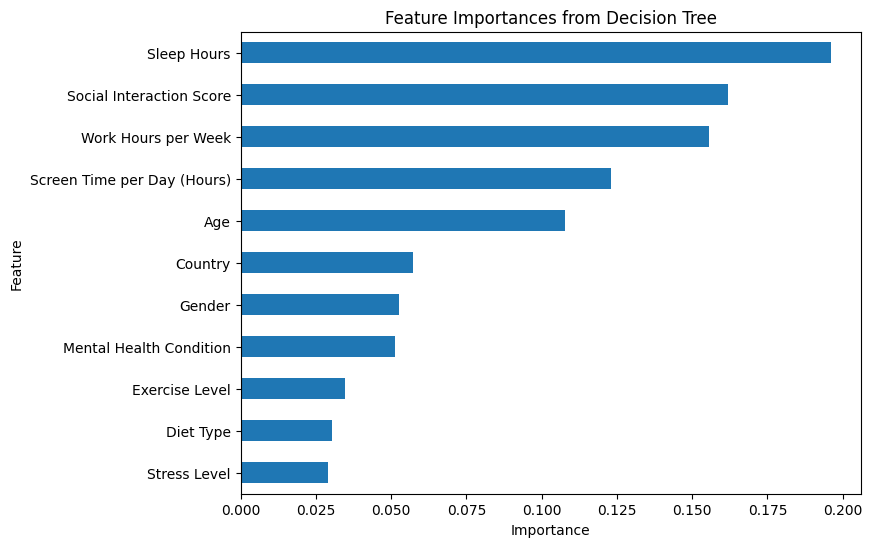

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
importances = pd.Series(tree.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=True)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title("Feature Importances from Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = tree.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 2.5434072975164965
MSE: 9.771060645814906
R2 Score: -0.443427907399389


üìä ÏïôÏÉÅÎ∏î Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê:
               Model     MAE     MSE  R2 Score
0      Decision Tree  0.2533  0.0875   -0.0475
1      Random Forest  0.2517  0.0852   -0.0190
2  Gradient Boosting  0.2517  0.0847   -0.0141


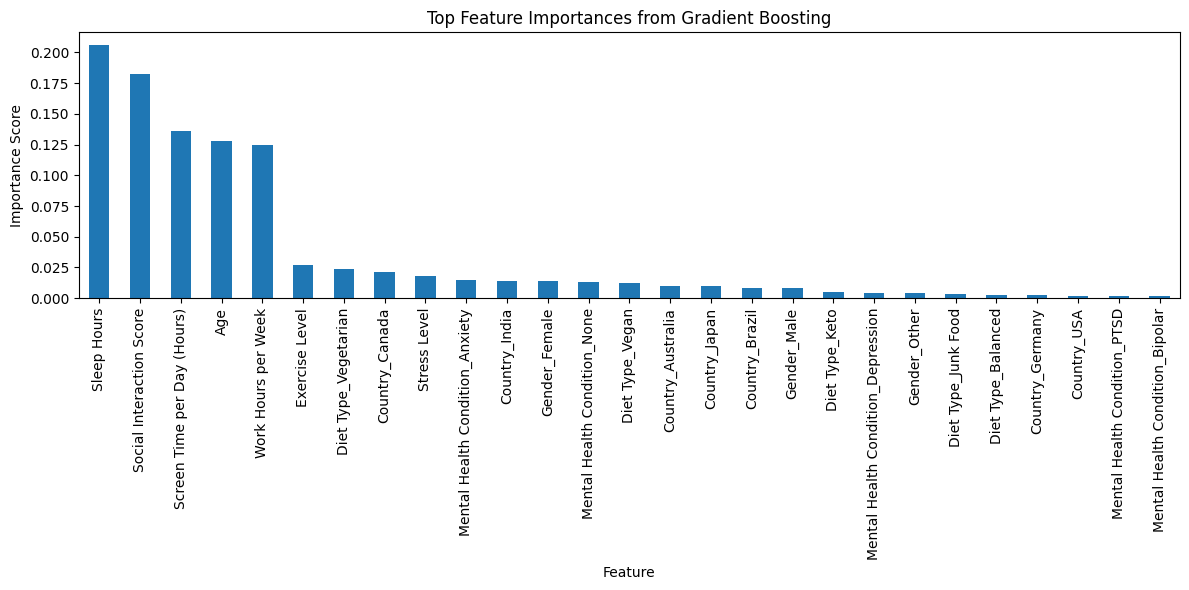

In [ ]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (NoneÏù¥ NaNÏúºÎ°ú Ï≤òÎ¶¨ÎêòÏßÄ ÏïäÎèÑÎ°ù!)
df = pd.read_csv(dataset_path, keep_default_na=False)

# 2. ÏàòÏπòÌòï Ïª¨Îüº Ï†ïÍ∑úÌôî (MinMax)
numeric_cols = ['Sleep Hours', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 3. Ordinal Î≥ÄÏàò Label Encoding
ordinal_map = {
    'Exercise Level': {'Low': 1, 'Moderate': 2, 'High': 3},
    'Stress Level': {'Low': 1, 'Moderate': 2, 'High': 3}
}
for col, mapping in ordinal_map.items():
    df[col] = df[col].map(mapping)

# 4. Nominal Î≥ÄÏàò One-Hot Encoding (0/1Î°ú!)
nominal_cols = ['Diet Type', 'Country', 'Gender', 'Mental Health Condition']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=False, dtype=int)

# 5. ÌÉÄÍ≤ü & ÌäπÏÑ± Î∂ÑÎ¶¨
y = df["Happiness Score"]
X = df.drop("Happiness Score", axis=1)

# 6. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Î™®Îç∏ Ï†ïÏùò
models = {
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 8. Î™®Îç∏ ÌõàÎ†® Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "R2 Score": round(r2, 4)
    })

# 9. ÏÑ±Îä• ÎπÑÍµê Ï∂úÎ†•
results_df = pd.DataFrame(results)
print("üìä ÏïôÏÉÅÎ∏î Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê:")
print(results_df)

# 10. Í∞ÄÏû• ÏÑ±Îä• Ï¢ãÏùÄ Î™®Îç∏Ïùò feature importance ÏãúÍ∞ÅÌôî (Ïòà: Gradient Boosting Í∏∞Ï§Ä)
best_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
best_model.fit(X_train, y_train)

importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
importances.plot(kind='bar')
plt.title("Top Feature Importances from Gradient Boosting")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


üìä Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê:
               Model  Accuracy  F1 Score
0      Decision Tree    0.3283    0.3065
1      Random Forest    0.3300    0.3294
2  Gradient Boosting    0.3283    0.3267

üìÑ Gradient Boosting Classification Report:
              precision    recall  f1-score   support

        High       0.32      0.26      0.29       191
         Low       0.34      0.35      0.35       202
      Medium       0.32      0.37      0.34       207

    accuracy                           0.33       600
   macro avg       0.33      0.33      0.33       600
weighted avg       0.33      0.33      0.33       600



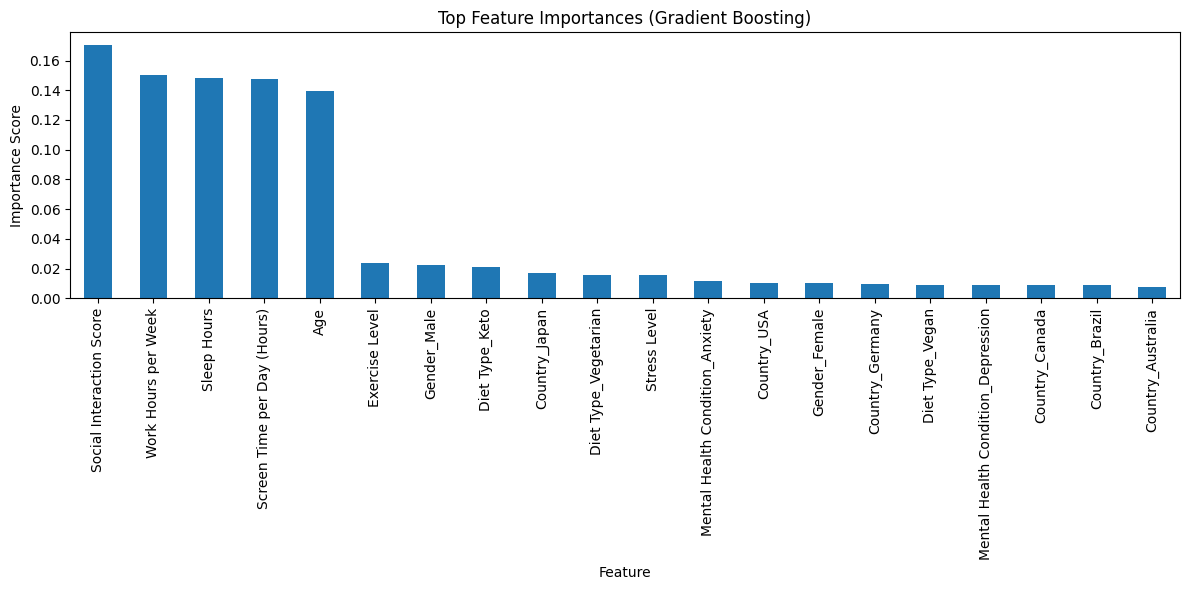

In [ ]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (NoneÏù¥ NaNÏúºÎ°ú Ï≤òÎ¶¨ÎêòÏßÄ ÏïäÎèÑÎ°ù!)
df = pd.read_csv(dataset_path, keep_default_na=False)

# 2. ÏàòÏπòÌòï Î≥ÄÏàò Ï†ïÍ∑úÌôî (MinMax)
numeric_cols = ['Sleep Hours', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 3. Ordinal Î≥ÄÏàò Label Encoding
ordinal_map = {
    'Exercise Level': {'Low': 1, 'Moderate': 2, 'High': 3},
    'Stress Level': {'Low': 1, 'Moderate': 2, 'High': 3}
}
for col, mapping in ordinal_map.items():
    df[col] = df[col].map(mapping)

# # 4. Nominal Î≥ÄÏàò One-Hot Encoding (0/1Î°ú Î≥ÄÌôò)
# nominal_cols = ['Diet Type', 'Country', 'Gender', 'Mental Health Condition']
# df = pd.get_dummies(df, columns=nominal_cols, drop_first=False, dtype=int)

# 5. üéØ ÌÉÄÍ≤ü: Happiness Level ÏÉùÏÑ± (Low, Medium, High)
df['Happiness Level'] = pd.cut(
    df['Happiness Score'],
    bins=[-1, 0.33, 0.66, 2],
    labels=['Low', 'Medium', 'High']
)

# 6. ÌäπÏÑ±Í≥º ÌÉÄÍ≤ü Î∂ÑÎ¶¨
X = df.drop(columns=['Happiness Score', 'Happiness Level'])
y = df['Happiness Level']

# 7. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Î™®Îç∏ Ï†ïÏùò
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 9. Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "F1 Score": round(f1, 4)
    })

# 10. ÏÑ±Îä• ÎπÑÍµê Ï∂úÎ†•
results_df = pd.DataFrame(results)
print("üìä Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê:")
print(results_df)

# 11. ÏÉÅÏÑ∏ Î≥¥Í≥†ÏÑú (Gradient Boosting Í∏∞Ï§Ä)
print("\nüìÑ Gradient Boosting Classification Report:")
print(classification_report(y_test, models["Gradient Boosting"].predict(X_test)))

# 12. Gradient BoostingÏùò Feature Importance ÏãúÍ∞ÅÌôî
importances = pd.Series(models["Gradient Boosting"].feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
importances.head(20).plot(kind='bar')
plt.title("Top Feature Importances (Gradient Boosting)")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


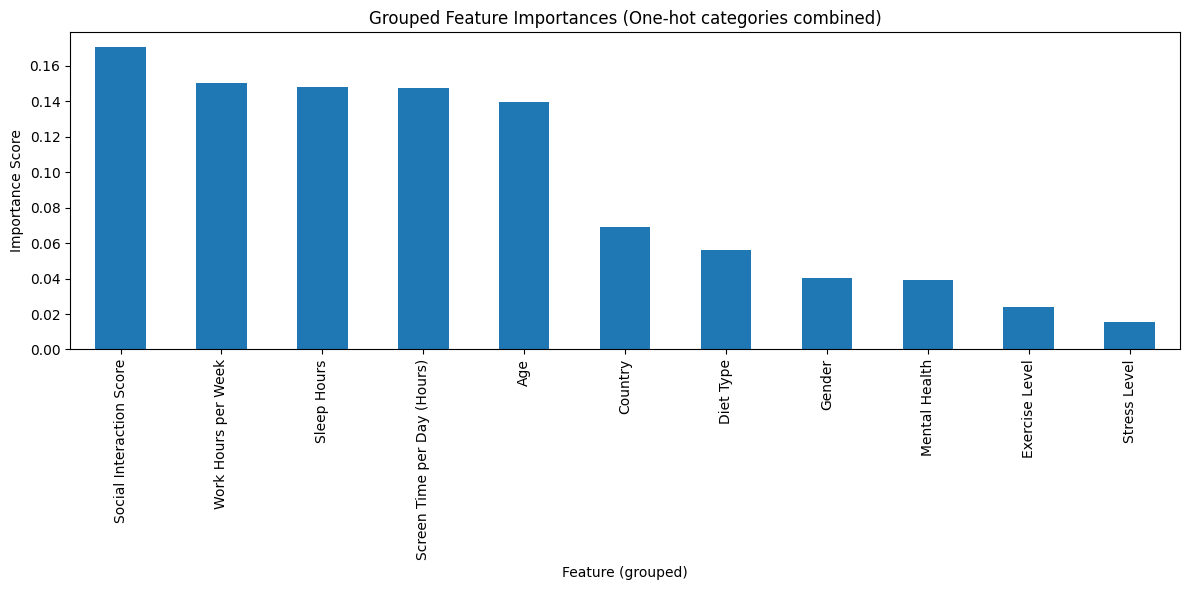

In [ ]:
# ÏòàÏãú: 'Diet Type_' Î°ú ÏãúÏûëÌïòÎäî Ïó¥Îì§Ïùò Ï§ëÏöîÎèÑ Ìï©ÏπòÍ∏∞
category_groups = {
    "Diet Type": [col for col in X_train.columns if col.startswith("Diet Type_")],
    "Country": [col for col in X_train.columns if col.startswith("Country_")],
    "Gender": [col for col in X_train.columns if col.startswith("Gender_")],
    "Mental Health": [col for col in X_train.columns if col.startswith("Mental Health Condition_")],
}

# ÏõêÎûò Ï§ëÏöîÎèÑ
importances = pd.Series(models["Gradient Boosting"].feature_importances_, index=X_train.columns)

# ÏÉàÎ°ú Ìï©ÏÇ∞Ìïú Ï§ëÏöîÎèÑ
grouped_importances = {}

for group_name, cols in category_groups.items():
    grouped_importances[group_name] = importances[cols].sum()

# ÏàòÏπòÌòï Î∞è Îã®Ïùº Ïó¥ featureÎèÑ Ï∂îÍ∞Ä
for col in importances.index:
    if not any(col in v for v in category_groups.values()):
        grouped_importances[col] = importances[col]

# Ï†ïÎ†¨ Î∞è ÏãúÍ∞ÅÌôî
grouped_series = pd.Series(grouped_importances).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
grouped_series.plot(kind='bar')
plt.title("Grouped Feature Importances (One-hot categories combined)")
plt.ylabel("Importance Score")
plt.xlabel("Feature (grouped)")
plt.tight_layout()
plt.show()
